In [125]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from datetime import datetime
from pandas import Series
df=pd.read_csv("C:\\Users\\Eric Gao\\Downloads\\datasets\\Electric_Production.csv")
df1=df.copy()
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [128]:
df["DATE"]=pd.to_datetime(df["DATE"])
df.dtypes
df.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [110]:
df["Days"]=df.DATE.dt.day
df["Month"]=df.DATE.dt.month
df["Year"]=df.DATE.dt.year
df["Day of week"]=df.DATE.dt.dayofweek
df["Week"]=df.DATE.dt.week
df.head()
def weekend_applyer(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0
temp2=df["DATE"].apply(weekend_applyer)
df["Weekend"]=temp2
df.head()

,DATE,IPG2211A2N,Days,Month,Year,Day of week,Week,Weekend
0,1985-01-01,72.5052,1,1,1985,1,1,0
1,1985-02-01,70.6720,1,2,1985,4,5,0
2,1985-03-01,62.4502,1,3,1985,4,9,0
3,1985-04-01,57.4714,1,4,1985,0,14,0
4,1985-05-01,55.3151,1,5,1985,2,18,0


DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)


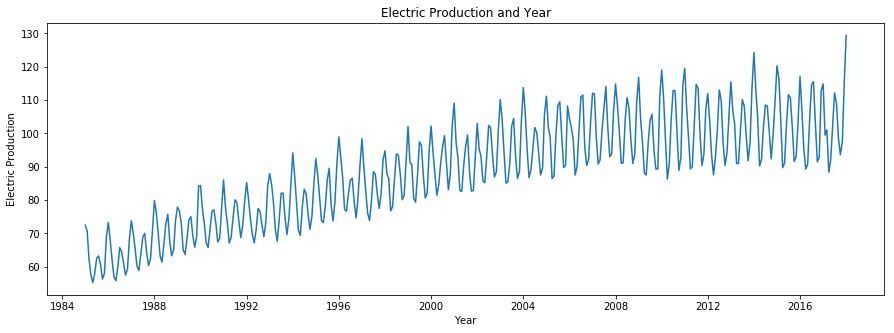

In [111]:
#date vs electric production in general
df.index=df.DATE
plt.figure(figsize=(15,5))
plt.plot(df.index, df.IPG2211A2N)
plt.xlabel("Year")
plt.ylabel("Electric Production")
plt.title("Electric Production and Year")
print(df.index)

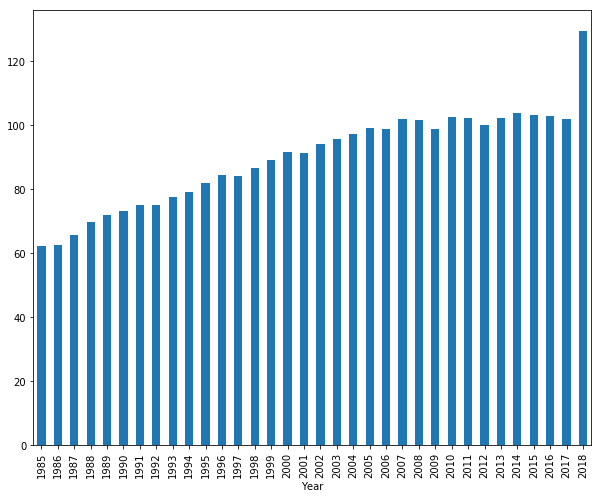

In [5]:
#Year vs electric production
plt.figure(figsize=(10,8))
df.groupby("Year")["IPG2211A2N"].mean().plot(kind="bar")
#2018 extremely high

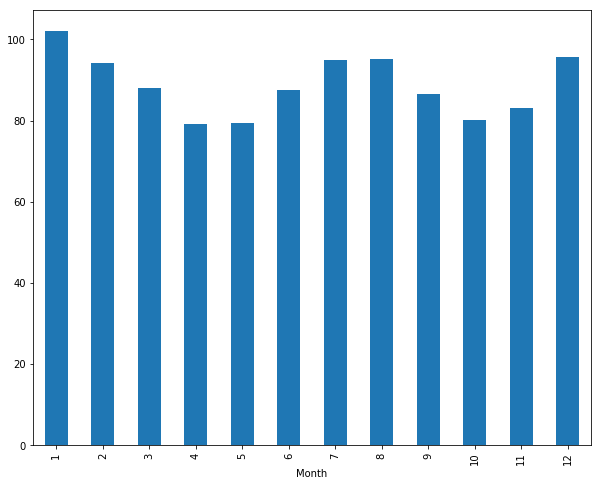

In [6]:
#month vs electric production
plt.figure(figsize=(10,8))
df.groupby("Month")["IPG2211A2N"].mean().plot(kind="bar")
#no noticeable trend

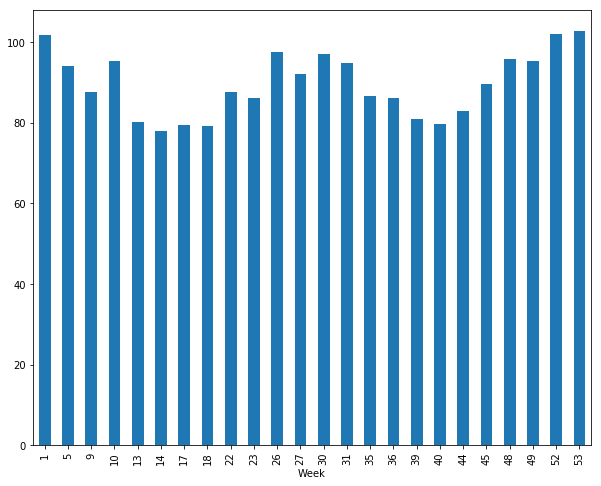

In [7]:
#week number vs electric production
plt.figure(figsize=(10,8))
df.groupby("Week")["IPG2211A2N"].mean().plot(kind="bar")
#Production is stable across weeks

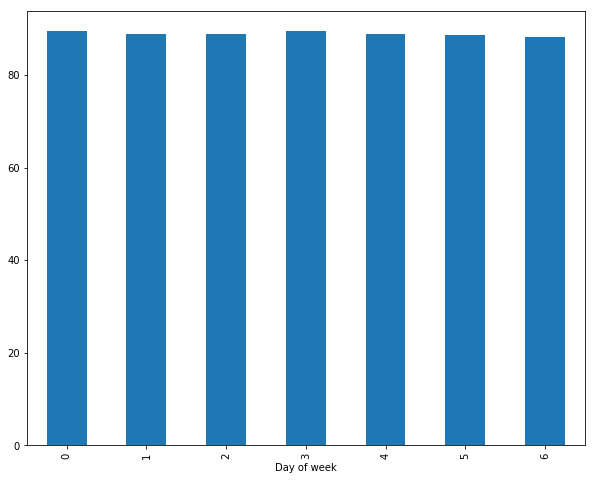

In [8]:
#day of week vs electric production
plt.figure(figsize=(10,8))
df.groupby("Day of week")["IPG2211A2N"].mean().plot(kind="bar")
#Production is stable across the days

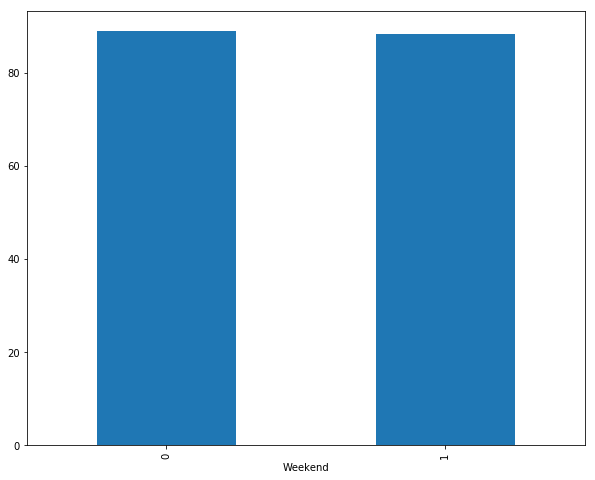

In [9]:
#Weekend vs electric production
plt.figure(figsize=(10,8))
df.groupby("Weekend")["IPG2211A2N"].mean().plot(kind="bar")
#Production is stable regardless of weekday or weekend

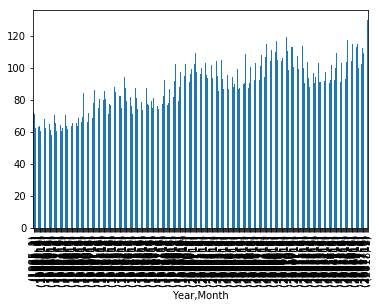

In [10]:
df.groupby(["Year", "Month"])["IPG2211A2N"].mean().plot(kind="bar")

Text(0, 0.5, 'Electric Production')

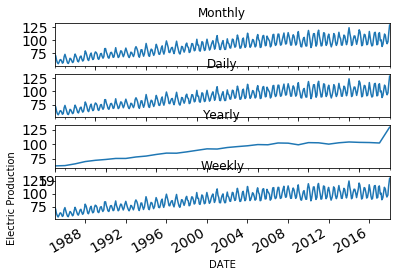

In [112]:
month=df.resample("M").mean()
day=df.resample("D").mean()
year=df.resample("A").mean()
week=df.resample("W").mean()
newday=pd.DataFrame(day)
newday=newday.dropna()
newweek=pd.DataFrame(week)
newweek=newweek.dropna()
fig,ax=plt.subplots(4,1)
month.IPG2211A2N.plot(fontsize=14, title="Monthly", ax=ax[0])
newday.IPG2211A2N.plot(fontsize=14, title="Daily", ax=ax[1])
year.IPG2211A2N.plot(fontsize=14, title="Yearly", ax=ax[2])
newweek.IPG2211A2N.plot(fontsize=14, title="Weekly", ax=ax[3])
plt.ylabel("Electric Production")

In [113]:
#resample month--month plot has least amount of noise
df.Timestamp=pd.to_datetime(df.DATE)
df.index=df.Timestamp
df=df.resample("M").mean()

C:\Users\Eric Gao\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [117]:
print(len(df.index)*0.7)
df.head()
df[df.index.day==31]

277.9


,IPG2211A2N,Days,Month,Year,Day of week,Week,Weekend
DATE,,,,,,,
1985-01-31,72.5052,1,1,1985,1,1,0
1985-03-31,62.4502,1,3,1985,4,9,0
1985-05-31,55.3151,1,5,1985,2,18,0
1985-07-31,62.6202,1,7,1985,0,27,0
1985-08-31,63.2485,1,8,1985,3,31,0
1985-10-31,56.3154,1,10,1985,1,40,0
1985-12-31,68.7145,1,12,1985,6,48,1
1986-01-31,73.3057,1,1,1986,2,1,0
1986-03-31,62.2221,1,3,1986,5,9,1


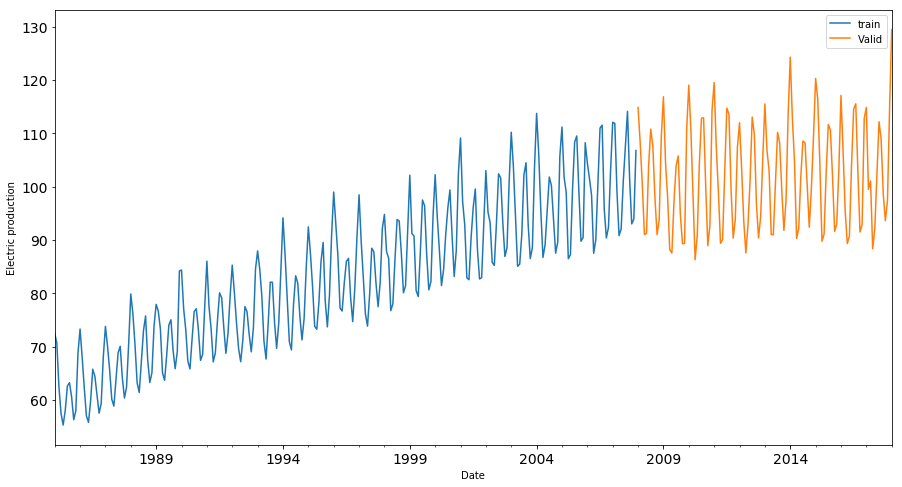

In [14]:
#resample months
train=df.loc["1985-01-01":"2008-01-01"]
valid=df.loc["2008-01-01":]
train.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="train")
valid.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="Valid")
plt.xlabel("Date")
plt.ylabel("Electric production")
plt.legend(loc="best")

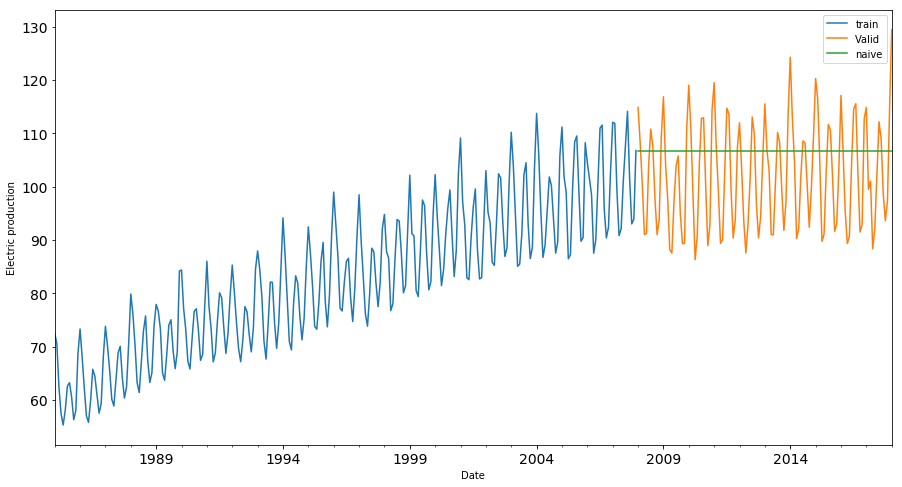

In [15]:
#1. Naive approach
arr=np.asarray(train.IPG2211A2N)
y_hat=valid.copy()
y_hat["naive"]=arr[len(arr)-1]
#resample months
train=df.loc["1985-01-01":"2008-01-01"]
valid=df.loc["2008-01-01":]
train.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="train")
valid.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="Valid")
y_hat['naive'].plot()
plt.xlabel("Date")
plt.ylabel("Electric production")
plt.legend(loc="best")

In [16]:
rmse=np.sqrt(mean_squared_error(valid.IPG2211A2N, y_hat["naive"]))
rmse

10.72362642192578

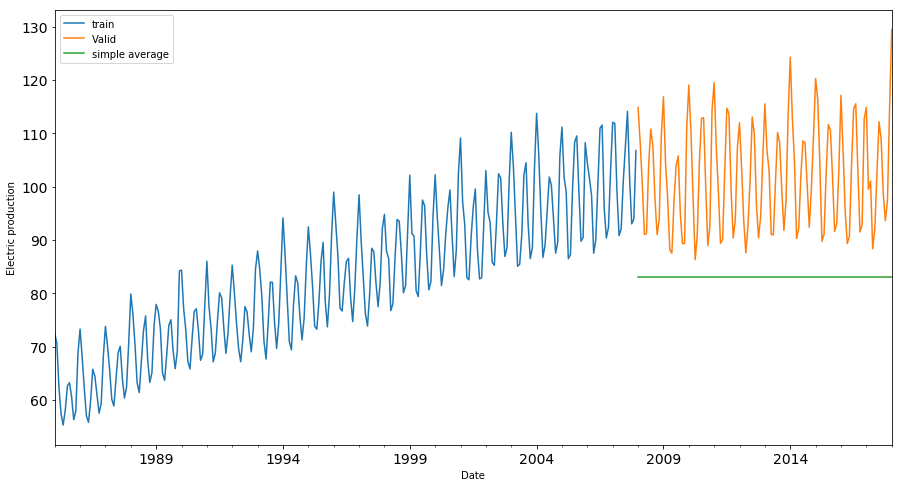

In [17]:
#2. Simple Average
y_hat=valid.copy()
y_hat['simple average']=(train.IPG2211A2N).mean()
train.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="train")
valid.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="Valid")
y_hat["simple average"].plot(figsize=(15,8), fontsize=14, label="simple average")
plt.xlabel("Date")
plt.ylabel("Electric production")
plt.legend(loc="best")

In [18]:
rmse=np.sqrt(mean_squared_error(valid.IPG2211A2N, y_hat["simple average"]))
rmse

21.4441814072845

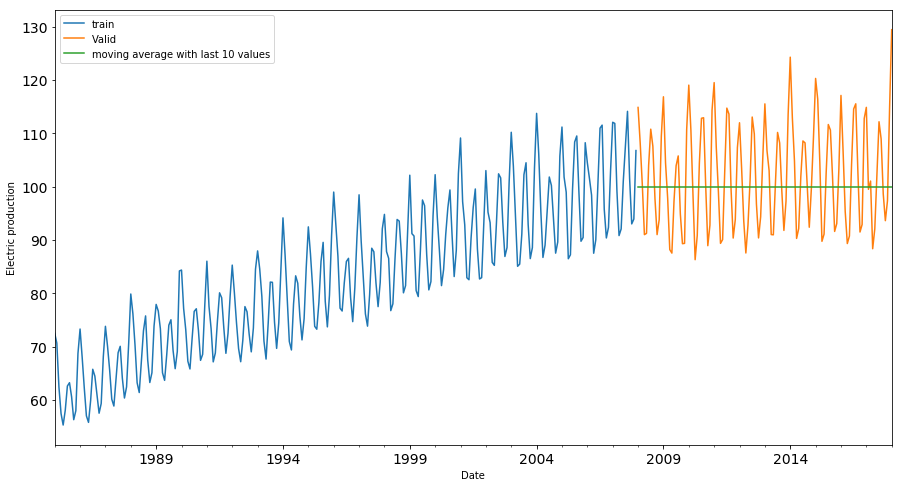

In [19]:
#3. Moving average
y_hat=valid.copy()
y_hat["moving average forecast"]=train.IPG2211A2N.rolling(10).mean().iloc[-1]
train.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="train")
valid.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="Valid")
y_hat["moving average forecast"].plot(figsize=(15,8), fontsize=14, label="moving average with last 10 values")
plt.xlabel("Date")
plt.ylabel("Electric production")
plt.legend(loc="best")
#print(y_hat["moving average forecast"])

In [20]:
rmse=np.sqrt(mean_squared_error(valid.IPG2211A2N, y_hat["moving average forecast"]))
rmse

9.922195636548295

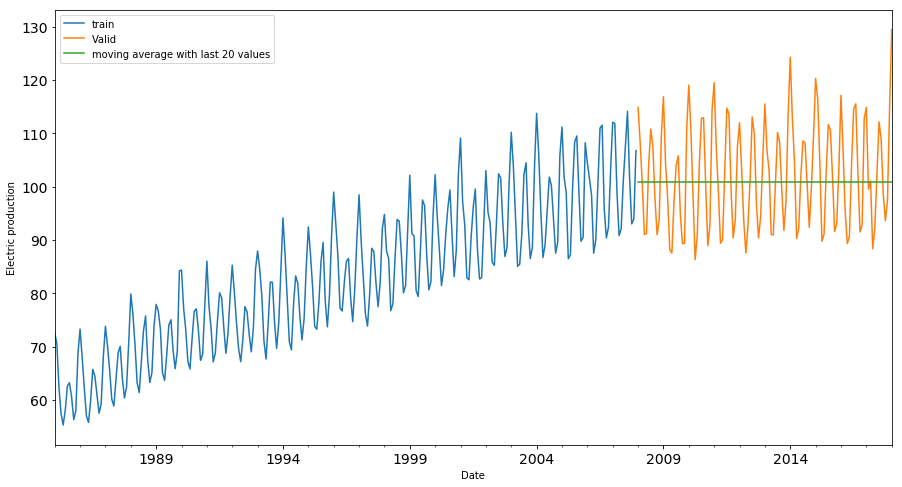

In [21]:
#3. Moving average
y_hat=valid.copy()
y_hat["moving average forecast"]=train.IPG2211A2N.rolling(20).mean().iloc[-1]
train.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="train")
valid.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="Valid")
y_hat["moving average forecast"].plot(figsize=(15,8), fontsize=14, label="moving average with last 20 values")
plt.xlabel("Date")
plt.ylabel("Electric production")
plt.legend(loc="best")
#print(y_hat["moving average forecast"])

In [22]:
rmse=np.sqrt(mean_squared_error(valid.IPG2211A2N, y_hat["moving average forecast"]))
rmse

9.76254350852633

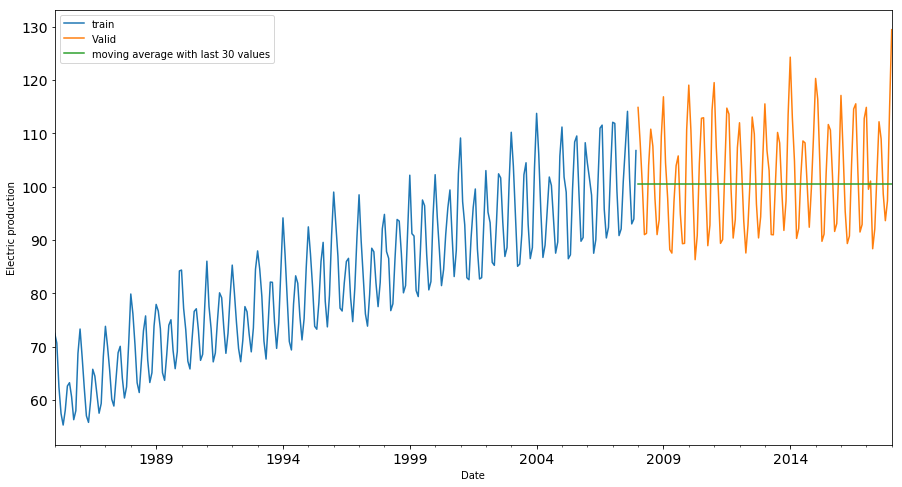

In [23]:
#3. Moving average
y_hat=valid.copy()
y_hat["moving average forecast"]=train.IPG2211A2N.rolling(30).mean().iloc[-1]
train.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="train")
valid.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="Valid")
y_hat["moving average forecast"].plot(figsize=(15,8), fontsize=14, label="moving average with last 30 values")
plt.xlabel("Date")
plt.ylabel("Electric production")
plt.legend(loc="best")
#print(y_hat["moving average forecast"])

In [24]:
rmse=np.sqrt(mean_squared_error(valid.IPG2211A2N, y_hat["moving average forecast"]))
rmse

9.820357759683972

In [25]:
#Moving average forecast works best for 20 values when it comes to this particular dataset.

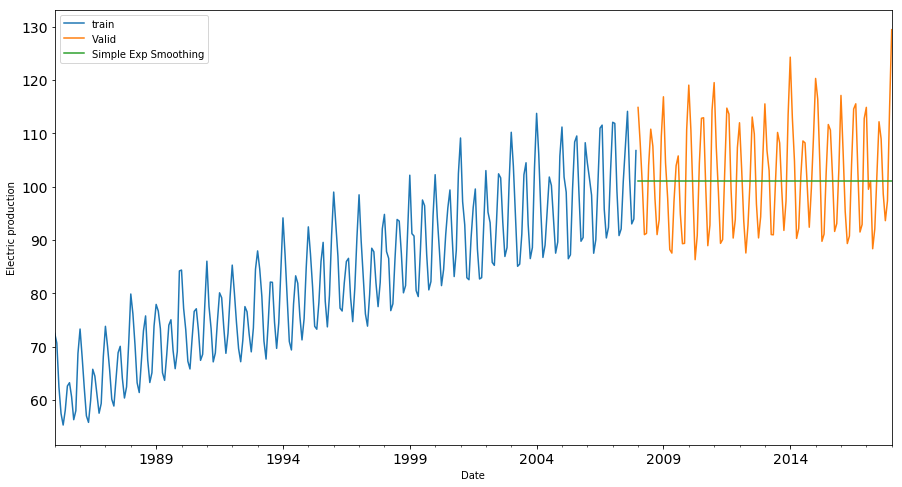

In [26]:
#4. Simple Exponential Smoothing
from statsmodels.tsa.api import SimpleExpSmoothing
y_hat=valid.copy()
fit=SimpleExpSmoothing(np.asarray(train.IPG2211A2N)).fit(smoothing_level=0.3, optimized=False)
y_hat["SES"]=fit.forecast(len(valid))
train.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="train")
valid.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="Valid")
y_hat["SES"].plot(figsize=(15,8), fontsize=14, label="Simple Exp Smoothing")
plt.xlabel("Date")
plt.ylabel("Electric production")
plt.legend(loc="best")

In [27]:
rmse=np.sqrt(mean_squared_error(valid.IPG2211A2N, y_hat["SES"]))
rmse

9.742102371590164

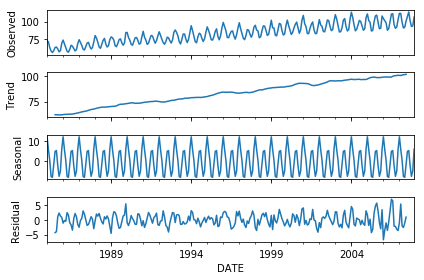

In [28]:
#5. Holt's Linear Model
#First, decompose the time series
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.IPG2211A2N).plot()
result=sm.tsa.stattools.adfuller(train.IPG2211A2N)
plt.show()

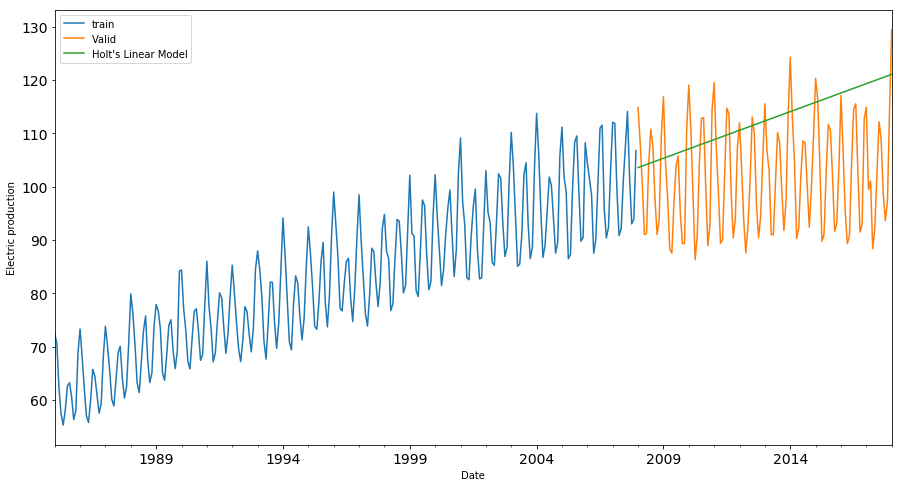

In [29]:
from statsmodels.tsa.holtwinters import Holt
y_hat=valid.copy()
fit1=Holt(np.asarray(train.IPG2211A2N)).fit(smoothing_level=0.01, smoothing_slope=0.01)
y_hat["Holt's Linear Model"]=fit1.forecast(len(valid))
train.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="train")
valid.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="Valid")
y_hat["Holt's Linear Model"].plot(figsize=(15,8), fontsize=14, label="Holt's Linear Model")
plt.xlabel("Date")
plt.ylabel("Electric production")
plt.legend(loc="best")

In [30]:
rmse=np.sqrt(mean_squared_error(valid.IPG2211A2N, y_hat["Holt's Linear Model"]))
rmse

14.619110508619164

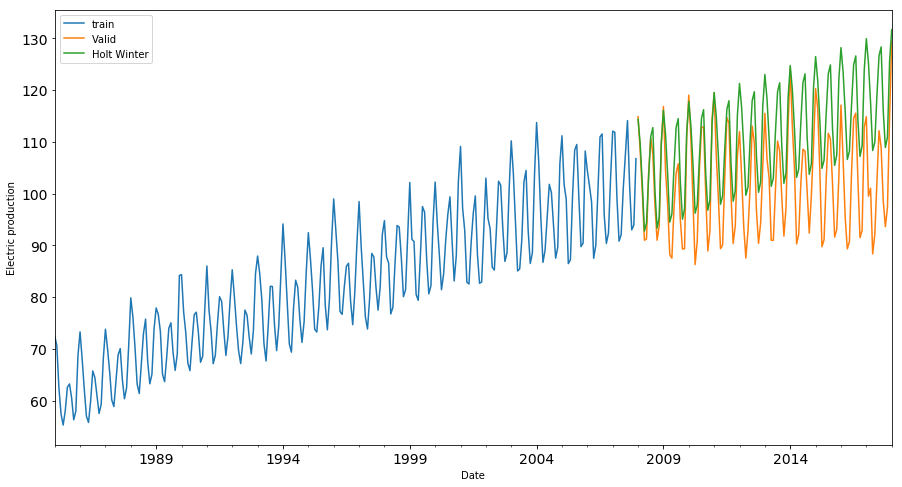

In [31]:
#6. Holt's Winter Method
from statsmodels.tsa.holtwinters import ExponentialSmoothing
y_hat=valid.copy()
fit2=ExponentialSmoothing(np.asarray(train.IPG2211A2N), trend="add", seasonal="add", seasonal_periods=12).fit()
y_hat["Holt Winter"]=fit2.forecast(len(valid))
train.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="train")
valid.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="Valid")
y_hat["Holt Winter"].plot(figsize=(15,8), fontsize=14, label="Holt Winter")
plt.xlabel("Date")
plt.ylabel("Electric production")
plt.legend(loc="best")

In [32]:
rmse=np.sqrt(mean_squared_error(valid.IPG2211A2N, y_hat["Holt Winter"]))
rmse

10.575524243632602

Results of Dickey Fuller test
Test stat               -0.967304
P-Value                  0.765002
# of Lags               15.000000
# of Obs               260.000000
Critical values 1%      -3.455754
Critical values 5%      -2.872721
Critical values 10%     -2.572728
dtype: float64


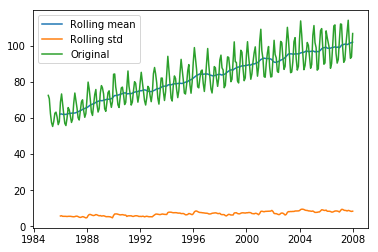

In [33]:
#Dickey fuller test to test for stationaritty
#Function
#Steps
#1. find rolling mean and std
#2. Plot them
#3. convert timeseries to a Series(pd.Series) then call function
from statsmodels.tsa.api import adfuller

def test_stationarity(timeseries):
    roll_mean=timeseries.rolling(12).mean()  #last 12 values because 12 months in a year
    roll_std=timeseries.rolling(12).std()
    
    rollmean=plt.plot(roll_mean, label="Rolling mean")
    rollstd=plt.plot(roll_std, label="Rolling std")
    original=plt.plot(timeseries, label="Original")
    
    plt.legend(loc="best")
    
    print("Results of Dickey Fuller test")
    dftest=adfuller(timeseries, autolag="AIC")
    new_series=pd.Series(dftest[0:4], index=["Test stat", "P-Value", "# of Lags", "# of Obs"])
    for key, val in dftest[4].items():
        new_series["Critical values %s" %key]=val
    print(new_series)
    
test_stationarity(train.IPG2211A2N)
#Test statistic not less than critical values, so we need to eliminate trend and seasonality

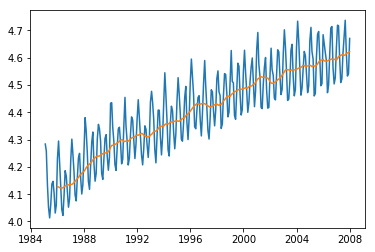

In [34]:
#Methods to deal with trend--taking the log of the original(then graph), taking the moving average, and then subtracting the two.
#Then check test stat again
train_log=np.log(train.IPG2211A2N)
valid_log=np.log(valid.IPG2211A2N)
moving_avg=train_log.rolling(12).mean()
plt.plot(train_log, label="")
plt.plot(moving_avg)

Results of Dickey Fuller test
Test stat               -5.645982
P-Value                  0.000001
# of Lags               14.000000
# of Obs               250.000000
Critical values 1%      -3.456781
Critical values 5%      -2.873172
Critical values 10%     -2.572969
dtype: float64


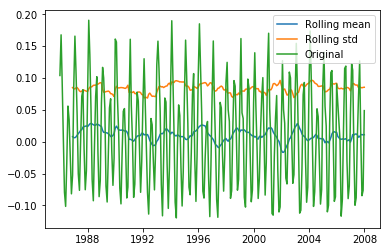

In [35]:
log_diff=train_log-moving_avg
log_diff=log_diff.dropna()
test_stationarity(log_diff)

Results of Dickey Fuller test
Test stat             -6.063223e+00
P-Value                1.198689e-07
# of Lags              1.400000e+01
# of Obs               2.600000e+02
Critical values 1%    -3.455754e+00
Critical values 5%    -2.872721e+00
Critical values 10%   -2.572728e+00
dtype: float64


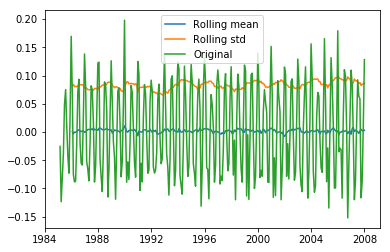

In [36]:
#taking care of both trend and seasonality
new_train_log=train_log-train_log.shift(1)
new_train_log.dropna(inplace=True)
test_stationarity(new_train_log)

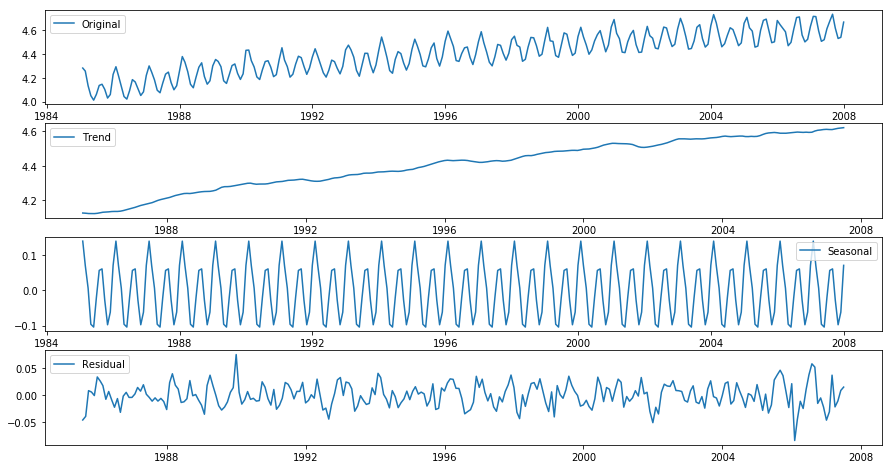

In [37]:
from statsmodels.tsa.api import seasonal_decompose
decompose=seasonal_decompose(train_log, freq=12)
residual=decompose.resid
seasonal=decompose.seasonal
trend=decompose.trend
plt.figure(figsize=(15,8))
plt.subplot(411)
plt.plot(train_log, label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal, label="Seasonal")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual, label="Residual")
plt.legend(loc="best")

Results of Dickey Fuller test
Test stat             -7.592057e+00
P-Value                2.516225e-11
# of Lags              1.400000e+01
# of Obs               2.490000e+02
Critical values 1%    -3.456888e+00
Critical values 5%    -2.873219e+00
Critical values 10%   -2.572994e+00
dtype: float64


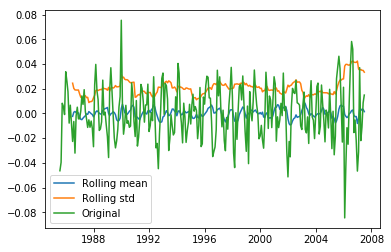

In [38]:
#decompose residual's trend and stationarity
train_log_decompose = residual
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose)

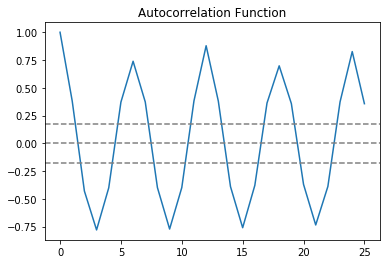

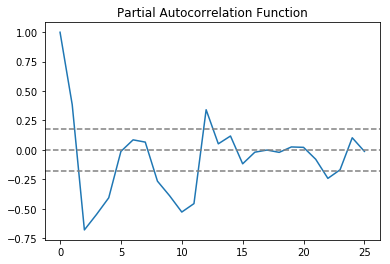

In [39]:
#Plot ACF, PACF
from statsmodels.tsa.stattools import acf, pacf #plotted after differencing
lag_acf=acf(new_train_log, nlags=25)
lag_pacf=pacf(new_train_log, nlags=25, method="ols")
#plotting
plt.plot(lag_acf)
plt.axhline(y=0, linestyle="--", color="grey")
plt.axhline(y=1.96*(1/np.sqrt(len(valid))), linestyle="--", color="grey")
plt.axhline(y=-1.96*(1/np.sqrt(len(valid))), linestyle="--", color="grey")
plt.title("Autocorrelation Function")
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle="--", color="grey")
plt.axhline(y=1.96*(1/np.sqrt(len(valid))), linestyle="--", color="grey")
plt.axhline(y=-1.96*(1/np.sqrt(len(valid))), linestyle="--", color="grey")
plt.title("Partial Autocorrelation Function")
plt.show()

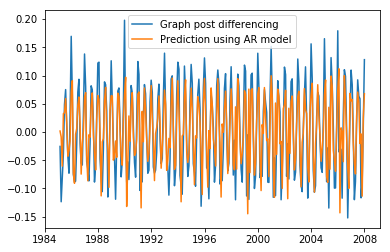

In [100]:
#ARIMA model
#AR model
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_log, order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(new_train_log, label="Graph post differencing")
plt.plot(results_AR.fittedvalues, label="Prediction using AR model")
plt.legend(loc="best")
#print("RMSE: %.4f" %(np.sqrt(sum(results_AR.fittedvalues-train_log))/(len(train_log))))
#print(new_train_log)

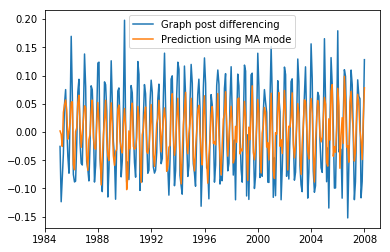

In [101]:
#MA model
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_log, order=(0,1,3))
results_MA=model.fit(disp=-1)
plt.plot(new_train_log, label="Graph post differencing")
plt.plot(results_MA.fittedvalues, label="Prediction using MA mode")
plt.legend(loc="best")

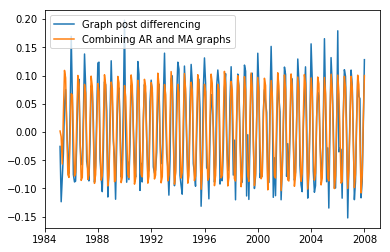

In [102]:
#Combined model
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_log, order=(2,1,3))
results_combined=model.fit(disp=-1)
plt.plot(new_train_log, label="Graph post differencing")
plt.plot(results_combined.fittedvalues, label="Combining AR and MA graphs")
plt.legend(loc="best")

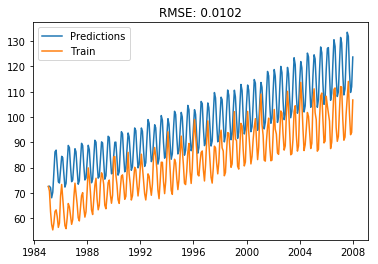

In [131]:
#Bring it back to original scale
#Steps
#1.converting to a series(results_combined)
#2. take the cumsum()
#3. put the cumsum values into another series, and begin with the 0th index
#4. add cumsum() to the series
#5. take exp
predictions_diff=pd.Series(results_combined.fittedvalues)
#print(predictions_diff)
predictions_diff_cumsum=predictions_diff.cumsum()
combined_model=pd.Series(train_log.iloc[0], index=train_log.index)
combined_model=combined_model.add(predictions_diff_cumsum, fill_value=0)
exp_model=np.exp(combined_model)
plt.plot
plt.plot(exp_model, label="Predictions")
plt.plot(train.IPG2211A2N, label="Train")
#plt.plot(valid.IPG2211A2N, label="Valid")
plt.title("RMSE: %.4f" %(np.sqrt(sum((combined_model-train_log)**2))/(len(train_log))))
plt.legend(loc="best")

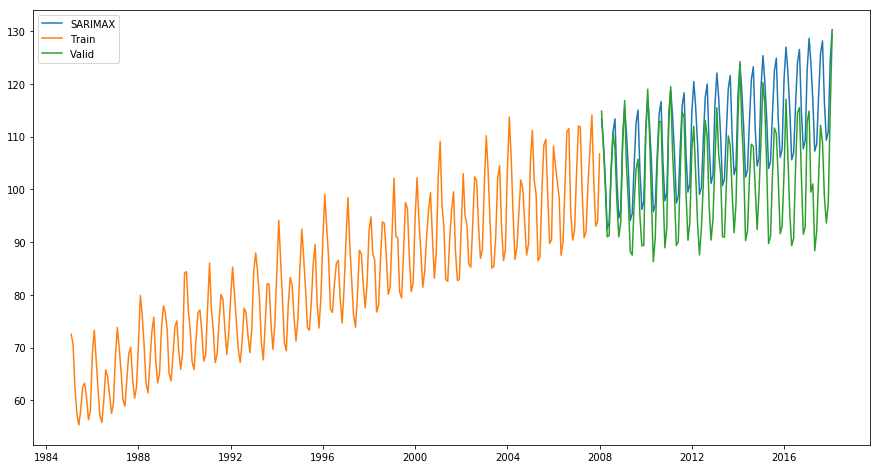

In [94]:
#7. Using Sarimax(seasonal ARIMA)
y_hat=valid.copy()
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train.IPG2211A2N, seasonal_order=(0,1,1,12), order=(1,1,4)).fit()
y_hat["SARIMAX"]=model.forecast(len(valid))
plt.figure(figsize=(15,8))
plt.plot(y_hat["SARIMAX"], label="SARIMAX")
plt.plot(train.IPG2211A2N, label="Train")
plt.plot(valid.IPG2211A2N, label="Valid")
#plt.figure(figsize=(15,8))
plt.legend(loc="best")

In [96]:
rmse=np.sqrt(mean_squared_error(y_hat["SARIMAX"], valid.IPG2211A2N))
rmse

10.262107029845238